**QUESTIONS:**

1. What are your steps in cleaning the dataset? Why did you choose the algorithm that you used in cleaning the dataset?

- First, I followed all the steps included inside the guide file, since all of the steps aids and aims to clean the data, which i intended to execute.

- To apply creativity on this dataset, I did a little bit of tweaks and added a few steps. I added another 2 categories, first was the "isAlone" category, identifying whether the passenger travelled alone or not. This can be a useful step to determine if the passenger has a relative inside the titanic.

- In addition, I added another category named titles, which help identifies the social status of the particular passenger by how are they addressed.

2. Create at least two (2) basic data analysis on two (2) columns in the dataset. Be creative and critical in deriving the insights on the data. You can show the visualization used to derive the insights.

Survival Rate by Age Group

- Children had the highest survival rate, likely due to the "women and children first" protocol during the evacuation.
- Teenagers and adults had moderate survival rates, while seniors had the lowest, possibly due to mobility challenges or prioritization during rescue efforts.

Survival Rate by Titles

- Passengers with common social titles such as Mr. and Miss. had moderate survival rates.
- Titles like Mrs. (likely married women) showed higher survival rates, possibly reflecting social norms that prioritized women in evacuation.
- The ‘Other’ category (including titles like Capt, Col, and Rev) had much lower survival rates, suggesting crew members or distinguished figures may have faced higher risks.

**LOADING THE DATA (AND IMPORTS)**

In [83]:
import seaborn as sns

In [36]:
import matplotlib.pyplot as plt

In [104]:
import pandas as pd
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**UNDERSTANDING THE DATA**

In [130]:
df.info()
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   passengerid  889 non-null    int64   
 1   survived     889 non-null    int64   
 2   pclass       889 non-null    category
 3   name         889 non-null    object  
 4   sex          889 non-null    object  
 5   age          889 non-null    float64 
 6   sibsp        889 non-null    int64   
 7   parch        889 non-null    int64   
 8   ticket       889 non-null    object  
 9   fare         889 non-null    float64 
 10  embarked     889 non-null    object  
 11  Title        889 non-null    object  
 12  IsAlone      889 non-null    int64   
 13  AgeGroup     889 non-null    category
dtypes: category(2), float64(2), int64(5), object(5)
memory usage: 92.4+ KB


Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked', 'Title', 'IsAlone', 'AgeGroup'],
      dtype='object')

**CHECKING FOR MISSING VALUES**

In [129]:
df.isnull().sum()

,0
passengerid,0
survived,0
pclass,0
name,0
sex,0
age,0
sibsp,0
parch,0
ticket,0
fare,0


**HANDLING MISSING VALUES**

In [106]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [107]:
df = df.drop(columns=["Cabin"])

In [108]:
df = df.dropna(subset=['Embarked'])

**CHECKING FOR DUPLICATES**

In [109]:
df.duplicated().sum()

0

**FIXING DATA TYPES**

In [110]:
df["Survived"] = df["Survived"].astype("category")
df["Pclass"] = df["Pclass"].astype("category")

**STANDARDIZING COLUMN NAMES**

In [112]:
df.columns = df.columns.str.lower()

**Bar Plot of Survival Count**

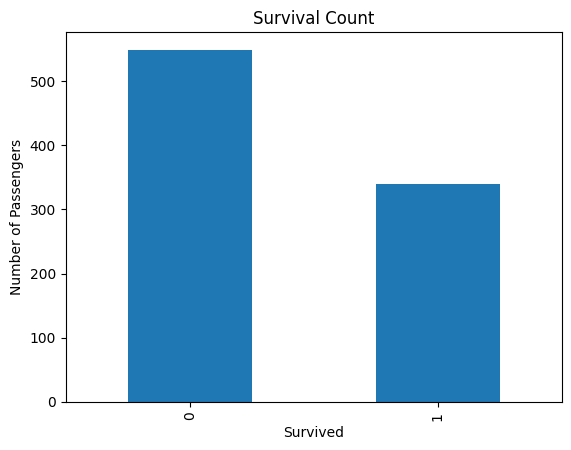

In [113]:
df["survived"].value_counts().plot(kind="bar")
plt.title("Survival Count")
plt.xlabel("Survived")
plt.ylabel("Number of Passengers")
plt.show()

**Histogram of Age Distribution**

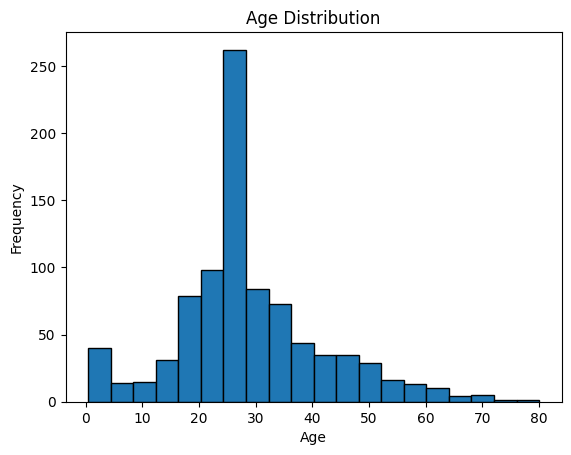

In [114]:
df["age"].plot(kind="hist", bins=20, edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

**Survival by Gender**

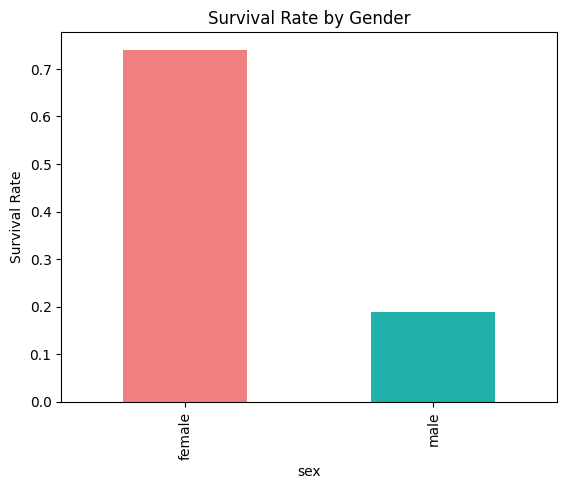

In [115]:
# Convert 'Survived' back to integer for aggregation
df['survived'] = df['survived'].astype(int)

df.groupby("sex")["survived"].mean().plot(kind="bar", color=['lightcoral', 'lightseagreen'])
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.show()


**---------------ADDITIONAL STEPS-----------------**

**EXTRACTING TITLES FROM NAMES**

In [116]:
df['Title'] = df['name'].str.extract(' ([A-Za-z]+)\\.', expand=False)

**CHECKING IF PASSENGER TRAVELLED ALONE**

In [117]:
df['IsAlone'] = (df['sibsp'] + df['parch'] == 0).astype(int)

**HANDLING TITLES AS CATEGORY**

In [118]:
titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
df['Title'] = df['Title'].replace(titles, 'Other')

**HANDING AGE CATEGORY AS GROUP**

In [119]:
df['AgeGroup'] = pd.cut(df['age'].fillna(df['age'].median()), bins=[0, 12, 18, 35, 60, 100],
                          labels=['Child', 'Teen', 'Adult', 'Middle-aged', 'Senior'])

In [120]:
print(df['AgeGroup'].value_counts())

AgeGroup
Adult          535
Middle-aged    194
Teen            70
Child           69
Senior          21
Name: count, dtype: int64


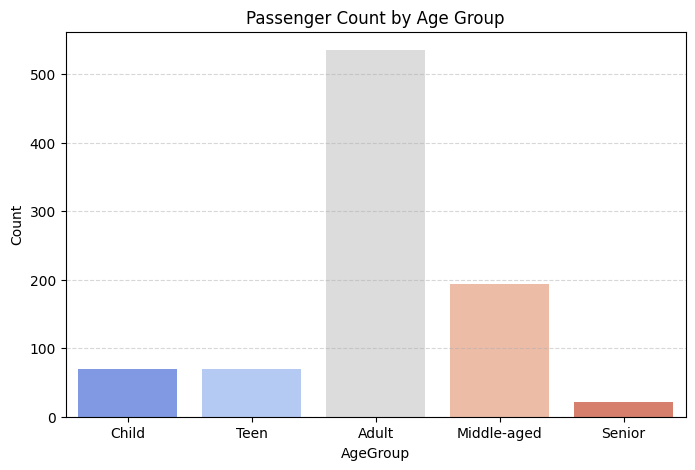

In [125]:
plt.figure(figsize=(8, 5))
sns.countplot(x='AgeGroup', data=df, hue='AgeGroup', palette='coolwarm', legend=False)
plt.title('Passenger Count by Age Group')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

**DISPLAYING/VISUALIZING "TITLES" CATEGORY**

Unique Titles: ['Mr' 'Mrs' 'Miss' 'Master' 'Other' 'Mme' 'Ms' 'Mlle']


<ipython-input-128-b4cc875474b9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Title', data=df, palette='muted')


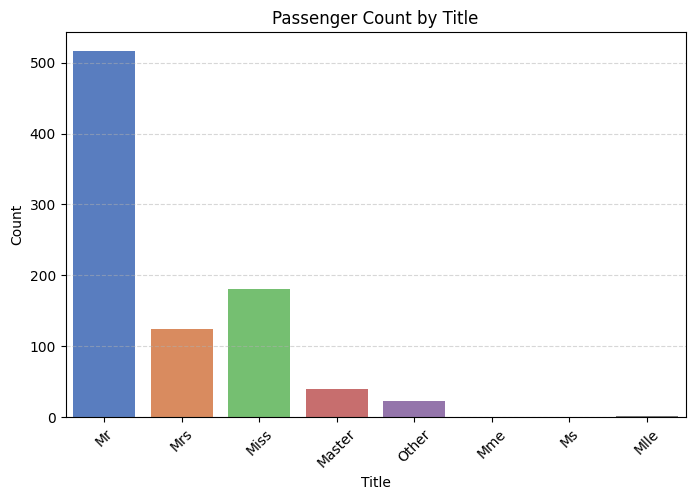

In [128]:
print("Unique Titles:", df['Title'].unique())
plt.figure(figsize=(8, 5))
sns.countplot(x='Title', data=df, palette='muted')
plt.title('Passenger Count by Title')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()